# Introduction

Ada beberapa cara untuk melakukan crawling data dari Twitter:

<lu>
    <li>Menggunakan API Twitter</li>
    <li>Menggunakan library tanpa API</li>
    <li>Manual scraping</li>
</lu>

# Pengenalan Twint

**Twint** adalah salah satu library untuk mengambil/crawling data dari Twitter tanpa harus menggunakan akses API. Untuk dokumentasi library ini dapat dibuka pada link ini https://github.com/twintproject. 

Keuntungan menggunakan Twint:
<ul>
    <li>Can fetch almost all Tweets (Twitter API limits to last 3200 Tweets only)</li>
    <li>Fast initial setup</li>
    <li>Can be used anonymously and without Twitter sign up</li>
    <li>No rate limitations</li>
</ul>

Hal pertama yang dilakukan adalah menginstall library ini menggunakan perintah berikut ini:

In [1]:
!pip3 install twint

Atau menggunakan kode berikut ini:

In [2]:
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\rozakc~1\appdata\local\temp\pip-install-nigruuh8\twint
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39138 sha256=ffdd6c5ff263da3e6735a2ca15540fce24d377948f55243f9f7709b2a33ec4e7
  Stored in directory: C:\Users\ROZAKC~1\AppData\Local\Temp\pip-ephem-wheel-cache-9xywbzkd\wheels\8d\dc\9f\74b4483d5f997036f04aec7f42bd4b3c80f04264920c368068
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21
  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\ROZAKC~1\AppData\Local\Temp\pip-install-nigruuh8\twint'
  Running command git checkout -q origin/master
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Simpan ke dalam bentuk MySQL

In [3]:
!pip install pymysql
!pip install mysql-connector-python-rf

In [4]:
!pip install nest_asyncio

# Import Dependencies

Selain **Twint**, disini dibutuhkan juga beberapa library pendukung lainnya, seperti:
<ul>
    <li>Pandas : Untuk olah data</li>
    <li>nest_asyncio : sebagai pendukung proses scraping oleh Twint</li>
    <li>json : untuk mengelolah file json</li>
<ul>

In [5]:
import twint
import nest_asyncio
import pandas as pd
import json

nest_asyncio.apply()

# Implementasi

Variable             Type       Description
--------------------------------------------
Username             (string) - Twitter user's username
User_id              (string) - Twitter user's user_id
Search               (string) - Search terms
Geo                  (string) - Geo coordinates (lat,lon,km/mi.)
Location             (bool)   - Set to True to attempt to grab a Twitter user's location (slow).
Near                 (string) - Near a certain City (Example: london)
Lang                 (string) - Compatible language codes: https://github.com/twintproject/twint/wiki/Langauge-codes
Output               (string) - Name of the output file.
Elasticsearch        (string) - Elasticsearch instance
Year                 (string) - Filter Tweets before the specified year.
Since                (string) - Filter Tweets sent since date, works only with twint.run.Search (Example: 2017-12-27).
Until                (string) - Filter Tweets sent until date, works only with twint.run.Search (Example: 2017-12-27).
Email                (bool)   - Set to True to show Tweets that _might_ contain emails.
Phone                (bool)   - Set to True to show Tweets that _might_ contain phone numbers.
Verified             (bool)   - Set to True to only show Tweets by _verified_ users
Store_csv            (bool)   - Set to True to write as a csv file.
Store_json           (bool)   - Set to True to write as a json file.
Custom               (dict)   - Custom csv/json formatting (see below).
Show_hashtags        (bool)   - Set to True to show hashtags in the terminal output.
Limit                (int)    - Number of Tweets to pull (Increments of 20).
Count                (bool)   - Count the total number of Tweets fetched.
Stats                (bool)   - Set to True to show Tweet stats in the terminal output.
Database             (string) - Store Tweets in a sqlite3 database.
To                   (string) - Display Tweets tweeted _to_ the specified user.
All                  (string) - Display all Tweets associated with the mentioned user.
Debug                (bool)   - Store information in debug logs.
Format               (string) - Custom terminal output formatting.
Essid                (string) - Elasticsearch session ID.
User_full            (bool)   - Set to True to display full user information. By default, only usernames are shown.
Profile_full         (bool)   - Set to True to use a slow, but effective method to enumerate a user's Timeline.
Store_object         (bool)   - Store tweets/user infos/usernames in JSON objects.
Store_pandas         (bool)   - Save Tweets in a DataFrame (Pandas) file.
Pandas_type          (string) - Specify HDF5 or Pickle (HDF5 as default).
Pandas               (bool)   - Enable Pandas integration.
Index_tweets         (string) - Custom Elasticsearch Index name for Tweets (default: twinttweets).
Index_follow         (string) - Custom Elasticsearch Index name for Follows (default: twintgraph).
Index_users          (string) - Custom Elasticsearch Index name for Users (default: twintuser).
Retries_count        (int)    - Number of retries of requests (default: 10).
Resume               (string) - Resume from the latest scroll ID, specify the filename that contains the ID.
Images               (bool)   - Display only Tweets with images.
Videos               (bool)   - Display only Tweets with videos.
Media                (bool)   - Display Tweets with only images or videos.
Pandas_clean         (bool)   - Automatically clean Pandas dataframe at every scrape.
Lowercase            (bool)   - Automatically convert uppercases in lowercases.
Pandas_au            (bool)   - Automatically update the Pandas dataframe at every scrape.
Proxy_host           (string) - Proxy hostname or IP.
Proxy_port           (int)    - Proxy port.
Proxy_type           (string) - Proxy type.
Tor_control_port     (int)    - Tor control port.
Tor_control_password (string) - Tor control password (not hashed).
Retweets             (bool)   - Get retweets done by the user.
Hide_output          (bool)   - Hide output.
Popular_tweets       (bool)   - Scrape popular tweets, not most recent (default: False).
Skip_certs           (bool)   - Skip certs verification for Elasticsearch, useful for SSC (default: False).
Native_retweets      (bool)   - Filter the results for retweets only (warning: a few tweets will be returned!).
Min_likes            (int)    - Filter the tweets by minimum number of likes.
Min_retweets         (int)    - Filter the tweets by minimum number of retweets.
Min_replies          (int)    - Filter the tweets by minimum number of replies.
Links                (string) - Include or exclude tweets containing one o more links. If not specified you will get both tweets that might contain links or not. (please specify `include` or `exclude`)
Source               (string) - Filter the tweets for specific source client. (example: `--source "Twitter Web Client"`)
Members_list         (string) - Filter the tweets sent by users in a given list.
Filter_retweets      (bool)   - Exclude retweets from the results.

# Atribut Output

Pada tahap ini dilakukan proses convert ke dataframe untuk memudahkan proses penambahan atribut. Disini data yang akan diambil adalah:
<lu>
    <li>**id**: Id tweet</li>
    <li>**conversation_id** : Id conversation (Jika bukan tweet original responden)</li>
    <li>**created_at**: Tanggal scraping</li>
    <li>**date**: Tanggal tweet dibuat</li>
    <li>**time**: Waktu tweet dibuat</li>
    <li>**timezone**: Zona waktu </li>
    <li>**user_id**: Id user</li>
    <li>**name**: Nama user</li>
    <li>**place**: Lokasi</li>
    <li>**tweet**: Teks tweet</li>
    <li>**language**: Bahasa</li>
    <li>**mentions**: Mention</li>
    <li>**urls**: Url tweet</li>
    <li>**photos**: Link foto</li>
    <li>**replies_count**: Jumlah Reply</li>
    <li>**retweets_count**: Jumlah retweet</li>
    <li>**likes_count**: Jumlah like</li>
    <li>**hashtags**: Hashtag</li>
    <li>**cashtags**: Cashtag</li>
    <li>**link**: Link</li>
    <li>**rewtweet**: Status apakah tweet ini hasil retweet</li>
    <li>**quote_url**: Url quote tweet</li>
    <li>**video**: Link vidio</li>
    <li>**thumnail**: Link thumnail</li>
    <li>**near**: Near</li>
    <li>**geo**: Data geografi</li>
    <li>**source**: Sumber</li>
    <li>**user_rt_id**: Id user yang diretweet</li>
    <li>**user_rt**: Nama user yang diretweet</li>
    <li>**retweet_id**: Id retweet</li>
    <li>**reply_to**: Balasan ke- </li>
    <li>**retweet_date**: Tanggal retweet</li>
    <li>**translate**: Terjemahan</li>
    <li>**trans_src**: Sumber terjemahan</li>
    <li>**trans_dest**: Tujuan terjemahan</li>
    </ul>

## Implementasi sederhana

In [ ]:
import twint

# Configure
config = twint.Config()
config.Username = "fiersabesari"
config.Search = "covid"

# Run
twint.run.Search(config)

1342371375504216064 2020-12-25 14:27:30 +0700 <FiersaBesari> Btw, waktu Aqia ketahuan positif covid itu tanggal 17 Desember, tiga hari sebelum rilis album saya. Padahal udah ngerencanain live acoustic dan podcast di sana-sini, melanjutkan Atap Negeri, tapi cancel semua. Karena enggak akan fokus juga. Family first, kerjaan bisa lain waktu
1342367740225458178 2020-12-25 14:13:03 +0700 <FiersaBesari> Yang bikin rumit adalah, Aqia sedang hamil. Kontrol kandungan terpaksa dibatalkan. Mau konsul ke RS perihal covid dan dampaknya terhadap janin (kami mencoba ke tiga RS), belum bisa menerima (kemungkinan karena full). Mau minum obat, enggak bisa sembarangan, karena ada dede bayi  https://t.co/kV8WLniqjk
1342362381708480513 2020-12-25 13:51:46 +0700 <FiersaBesari> Semua berawal ketika keluarga dekat Aqia menunjukkan gejala covid, padahal belum lama Aqia ketemu beliau. Ketika orang tersebut swab, ternyata positif. Setelahnya, Aqia sempat demam. Karena curiga, kami pun melakukan swab test. Dan be

## Ambil Tweet by username

In [ ]:
c = twint.Config()
c.Username = 'FiersaBesari'
twint.run.Profile(c)

1377056017003864065 2021-03-31 07:31:53 +0700 <FiersaBesari> @bijiktumbar Congrats
1377045635006787587 2021-03-31 06:50:38 +0700 <FiersaBesari> @dsuperdede Dicariin Mas Al malah nongkrong di Twitter lu ah
1377045052480913411 2021-03-31 06:48:19 +0700 <FiersaBesari> @fiikoquraisy Nah, curiganya begini sih. Tapi, Elsa udah ketakutan
1377044510979461122 2021-03-31 06:46:10 +0700 <FiersaBesari> @mataiikan Enggak gitu juga anjir
1377043954135228418 2021-03-31 06:43:57 +0700 <FiersaBesari> Ampe kebawa mimpi. Pokoknya awas aja kalau Sumarno enggak jujur ke Tante Rosa
1376883327701975042 2021-03-30 20:05:41 +0700 <FiersaBesari> Hidup akan lebih mudah kalau hal kecil enggak digede-gedein dan hal gede diberesin sampai jadi kecil
1376749328727875588 2021-03-30 11:13:13 +0700 <FiersaBesari> @ciloqciliq Mulaaaaiiiiii
1376692694269849604 2021-03-30 07:28:10 +0700 <FiersaBesari> @hiboorans Lah 😅
1376670560852135936 2021-03-30 06:00:13 +0700 <FiersaBesari> @real_fahmia Going out of my head, alone in t

## Menggunakan Parameter Twint

In [19]:
c = twint.Config()
c.Username = 'FiersaBesari'
c.Since = "2020-01-01" #batas awal tanggal pengambilan tweet
c.Until = "2021-03-25" #batas akhir tanggal pengambilan tweet
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
c.Search = "covid"
c.Output = 'test.json' # save to json
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 8 Tweets from @FiersaBesari.


In [16]:
c = twint.Config()
c.Username = 'JogjaUpdate'
c.Since = "2020-08-01"
c.Until = "2021-01-31"
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
c.Search = "vaksin OR vaksinasi"
c.Output = 'output_twint_sebelum.json' # save to json
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 5 Tweets from @JogjaUpdate.


In [17]:
c = twint.Config()
c.Username = 'JogjaUpdate'
c.Since = "2021-02-15"
c.Until = "2021-05-15"
c.Count = True         
c.Retweets = True
c.Stats = True 
c.Show_hashtags = True
c.Hide_output = True
c.Profile_full = True
c.Store_json = True
c.Search = "vaksin OR vaksinasi"
c.Output = 'output_twint_setelah.json' # save to json
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 9 Tweets from @JogjaUpdate.


**Catatan**: Untuk memulai proses pengambilan Tweet, pastikan data sebelumnya telah dihapus (Agar tidak duplikat)

In [18]:
df = pd.read_json('output_twint_sebelum.json' , lines = True)
# df
df = df[['conversation_id', 'id','date','time','username','tweet','mentions','replies_count','retweets_count','likes_count','hashtags','reply_to','link']]

## Ambil Data Dari Beberapa Akun

In [19]:
df

,conversation_id,id,date,time,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link
0,1349566043853787136,1349566043853787138,2021-01-14,10:56:33,jogjaupdate,Nek suntik vaksin covid kui mengko entuk bubur...,"[{'screen_name': 'sayaizin', 'name': 'masiz', ...",4,11,29,[],[],https://twitter.com/JogjaUpdate/status/1349566...
1,1349370622078570496,1349370622078570499,2021-01-13,22:00:01,jogjaupdate,Lagi vaksin covid ... @kriezta https://t.co/...,"[{'screen_name': 'kriezta', 'name': 'kata', 'i...",4,16,77,[],[],https://twitter.com/JogjaUpdate/status/1349370...
2,1339215915238322176,1339215915238322177,2020-12-16,21:28:50,jogjaupdate,Tidak ada alasan masyarakat tidak mendapatkan ...,[],0,5,15,[],[],https://twitter.com/JogjaUpdate/status/1339215...
3,1299512089531133952,1299512089531133954,2020-08-29,08:00:00,jogjaupdate,Pentingnya Vaksinasi Sebelum Pernikahan https...,[],0,0,14,[],[],https://twitter.com/JogjaUpdate/status/1299512...
4,1292439006869741568,1292439006869741569,2020-08-09,19:34:06,jogjaupdate,Peneliti Vaksin: Hanya Antibodi yang Dapat Mer...,"[{'screen_name': 'trenasia_com', 'name': 'tren...",0,6,18,[],[],https://twitter.com/JogjaUpdate/status/1292439...


In [ ]:
usernames = ['fiersabesari','ernestprakasa']
for username in usernames:
    try:
        c = twint.Config()
        c.Username = username
        c.Since = "2021-03-01" #batas awal tanggal pengambilan tweet
        c.Until = "2021-03-25" #batas akhir tanggal pengambilan tweet
        c.Count = True         
        c.Retweets = True
        c.limit = 100
        c.Stats = True 
        c.Show_hashtags = True
        c.Hide_output = True
        c.Profile_full = True
        c.Store_json = True
        c.Output = './data/output_twint_2.json' # save to json
        twint.run.Profile(c)
    except:
        continue

Error: KeyboardInterrupt

In [ ]:
df = pd.read_json('./data/output_twint_2.json' , lines = True)
df[['conversation_id', 'id','date','time','username','tweet','mentions','replies_count','retweets_count','likes_count','hashtags','reply_to','link']]

,conversation_id,id,date,time,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link
0,1374732456578797568,1374732456578797570,2021-03-24,21:38:53,fiersabesari,"Gas, Lur . https://t.co/WTcQpmw6Ue https://t...",[],122,87,3157,[],[],https://twitter.com/FiersaBesari/status/137473...
1,1374460697027899392,1374553596939800581,2021-03-24,09:48:10,fiersabesari,@KuntoAjiW https://t.co/WixfofD8Uk,[],12,4,350,[],"[{'screen_name': 'KuntoAjiW', 'name': 'M Z K U...",https://twitter.com/FiersaBesari/status/137455...
2,1374504418922565632,1374504418922565638,2021-03-24,06:32:45,fiersabesari,"Jaga-jaga hari ini ada yang nyakitin, stok sem...",[],674,6925,37864,[],[],https://twitter.com/FiersaBesari/status/137450...
3,1374370977350447104,1374371568365621249,2021-03-23,21:44:51,fiersabesari,@pandama76730755 Nyaman dan enjoy,[],1,2,23,[],"[{'screen_name': 'pandama76730755', 'name': 'p...",https://twitter.com/FiersaBesari/status/137437...
4,1374370977350447104,1374370977350447109,2021-03-23,21:42:30,fiersabesari,Enggak perlu memaksakan standarmu untuk hidup ...,[],272,7260,25003,[],[],https://twitter.com/FiersaBesari/status/137437...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1356108544739696640,1356108544739696640,2021-02-01,12:14:07,fiersabesari,"“Tahukah kau rasa ini, telah kusimpan sejak la...","[{'screen_name': 'bemandry', 'name': 'bemandry...",88,273,3770,[],[],https://twitter.com/FiersaBesari/status/135610...
770,1356045289547837440,1356048117909610499,2021-02-01,08:14:00,fiersabesari,@DennisAdriansya Ternyata Bang Radit indigo 🤯,[],3,5,357,[],"[{'screen_name': 'DennisAdriansya', 'name': 'D...",https://twitter.com/FiersaBesari/status/135604...
771,1356046927171751936,1356047509379031045,2021-02-01,08:11:35,fiersabesari,@pakasur1 Siap kaum elit 😘,[],4,0,195,[],"[{'screen_name': 'pakasur1', 'name': 'ًpace', ...",https://twitter.com/FiersaBesari/status/135604...
772,1356045289547837440,1356045289547837441,2021-02-01,08:02:45,fiersabesari,Gadis Kentang 💔 https://t.co/0jxGzarazg,[],1127,2306,26095,[],[],https://twitter.com/FiersaBesari/status/135604...


# Introduction Web Scraping

**Web Scraping** is a process of automating the extraction of data in an efficient and fast way to extract data from any website.

Secara umum, ada dua cara yang bisa Anda gunakan untuk melakukannya:
<lu>
    <li>**Manual** — metode di mana Anda menyalin data dengan cara copy paste dari sebuah website</li>
    <li>**Otomatis** — metode yang menggunakan koding, aplikasi, atau extension browser.</li>
</lu>

## Introduction Selenium

<b>Selenium</b> merupakan salah satu tools automation testing.

![image.png](attachment:image.png)

1. Langkah pertama download terlebih dahulu webdriver untuk melakukan manual scraping https://chromedriver.chromium.org/ 
    
    (Bisa menggunakan webdriver dari browser lain, seperti Firefox atau Edge, tetapi disini digunakan browser <b>Chrome</b>)
    
    
2. Download library yang dibutuhkan:
    <ul>
        <li>pip install selenium</li>
        <li>pip install time</li>
        <li>pip install getpass</li>
    </ul>

In [1]:
!pip install selenium

In [2]:
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [3]:
!pip install getpass

ERROR: Could not find a version that satisfies the requirement getpass (from versions: none)
ERROR: No matching distribution found for getpass


## Import Dependecies

In [20]:
from getpass import getpass
from time import sleep
from selenium.webdriver.common.keys import Keys
# from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

## Setting WebDriver

Disini dilakukan pengaturan terhadap webdriver sebagai media scraping

Pengaturan yang dilakukan:
<ul>
    <li>Non-Aktifkan notifikasi browser</li>
    <li>Melakukan Scraping tanpa membuka browser</li>
</ul>

**Catatan**: Pastikan telah download webdriver Chrome, kemudian copy path instalasi dari WebDriver

In [21]:
chrome_options = webdriver.ChromeOptions()
prefs = {"profile.default_content_setting_values.notifications" : 2}
chrome_options.add_experimental_option("prefs",prefs)
# chrome_options.add_argument('headless') # untuk menutup browser

#specify the path to chromedriver.exe
driver = webdriver.Chrome('D:/Downloads/chromedriver',chrome_options=chrome_options)

ipykernel_launcher:7: DeprecationWarning: use options instead of chrome_options


## Log In to Twitter

Pastikan username dan password benar benar

In [22]:
driver.get('https://www.twitter.com/login')
sleep(2)

username = driver.find_element_by_xpath('//input[@name="session[username_or_email]"]')
username.send_keys('rozak_b') # Ubah username sesuai akun pribadi

my_password = getpass()

password = driver.find_element_by_xpath('//input[@name="session[password]"]')
password.send_keys(my_password)
password.send_keys(Keys.RETURN)

## Open Link

In [23]:
data_tweets = df[['conversation_id', 'id','date','time','username','tweet','mentions','replies_count','retweets_count','likes_count','hashtags','reply_to','link']].head(9)
data_tweets

,conversation_id,id,date,time,username,tweet,mentions,replies_count,retweets_count,likes_count,hashtags,reply_to,link
0,1349566043853787136,1349566043853787138,2021-01-14,10:56:33,jogjaupdate,Nek suntik vaksin covid kui mengko entuk bubur...,"[{'screen_name': 'sayaizin', 'name': 'masiz', ...",4,11,29,[],[],https://twitter.com/JogjaUpdate/status/1349566...
1,1349370622078570496,1349370622078570499,2021-01-13,22:00:01,jogjaupdate,Lagi vaksin covid ... @kriezta https://t.co/...,"[{'screen_name': 'kriezta', 'name': 'kata', 'i...",4,16,77,[],[],https://twitter.com/JogjaUpdate/status/1349370...
2,1339215915238322176,1339215915238322177,2020-12-16,21:28:50,jogjaupdate,Tidak ada alasan masyarakat tidak mendapatkan ...,[],0,5,15,[],[],https://twitter.com/JogjaUpdate/status/1339215...
3,1299512089531133952,1299512089531133954,2020-08-29,08:00:00,jogjaupdate,Pentingnya Vaksinasi Sebelum Pernikahan https...,[],0,0,14,[],[],https://twitter.com/JogjaUpdate/status/1299512...
4,1292439006869741568,1292439006869741569,2020-08-09,19:34:06,jogjaupdate,Peneliti Vaksin: Hanya Antibodi yang Dapat Mer...,"[{'screen_name': 'trenasia_com', 'name': 'tren...",0,6,18,[],[],https://twitter.com/JogjaUpdate/status/1292439...


In [24]:
def get_list_likes(link):
    list_likes = []
    driver.get(link + '/likes')#open link
    sleep(2) #jeda waktu
    
    #scroll to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        likes_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Liked by"]') #element dasar likes
        if likes_container: #jika ada maka
            likes = likes_container.find_elements_by_xpath('//div[@dir="ltr"]/span')
            for like in likes:
                list_likes.append(like.text)
    except:
        return list_likes
    return list_likes



def get_list_retweets(link):
    list_retweets = []
    driver.get(link + '/retweets') #open link
    sleep(2)#jeda waktu
    
    #scroll to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    sleep(2)
    
    try:
        retweets_container = driver.find_element_by_xpath('//div[@aria-label="Timeline: Retweeted by"]')
        if retweets_container:
            retweets = retweets_container.find_elements_by_xpath('//div[@dir="ltr"]/span')
            for retweet in retweets:
                list_retweets.append(retweet.text)
    except:
        pass
    return list_retweets

## Scarping

In [27]:
arr_temp = []
for i, row in data_tweets.iterrows():
     arr_temp.append(get_list_likes(row['link']))   

data_tweets['list_likes'] = arr_temp

In [28]:
data_tweets['list_likes']

0    [@HsNSaedjo, @Shermanlogan12, @nptaxs_, @nick_...
1    [@rckkz_, @Surya6Belas, @AlifKhusnu, @EgisSand...
2    [@_robertiwan, @rynaldiadam, @diandramita, @Pu...
3    [@WldanH, @diyanmakom_, @ganjartri, @cahyantam...
4    [@patuadaniel, @adfreshid, @bicitiki, @RHA36, ...
Name: list_likes, dtype: object

In [178]:
data_tweets.dtypes

conversation_id             int64
id                          int64
date               datetime64[ns]
time                       object
username                   object
tweet                      object
mentions                   object
replies_count               int64
retweets_count              int64
likes_count                 int64
hashtags                   object
reply_to                   object
link                       object
list_likes                 object
list_retweets              object
dtype: object

In [29]:
arr_temp = []
for i, row in data_tweets.iterrows():
     arr_temp.append(get_list_retweets(row['link']))

data_tweets['list_retweets'] = arr_temp
data_tweets['list_retweets']

0    [@sayaizin, @faridnugroho_, @uzizaa, @fajarsat...
1    [@kocceng_, @nisapuspita, @Denny_Denol154, @Nu...
2    [@Sugiyan61442128, @Tashoajaa, , , , , , @Watc...
3                                                   []
4    [@bluesmaless81, @5tegarrrrrr, @wahyurmadhannn...
Name: list_retweets, dtype: object

In [30]:
testing = data_tweets[['username','list_likes']].head(9)
testing

,username,list_likes
0,jogjaupdate,"[@HsNSaedjo, @Shermanlogan12, @nptaxs_, @nick_..."
1,jogjaupdate,"[@rckkz_, @Surya6Belas, @AlifKhusnu, @EgisSand..."
2,jogjaupdate,"[@_robertiwan, @rynaldiadam, @diandramita, @Pu..."
3,jogjaupdate,"[@WldanH, @diyanmakom_, @ganjartri, @cahyantam..."
4,jogjaupdate,"[@patuadaniel, @adfreshid, @bicitiki, @RHA36, ..."


In [43]:
import json
arr = []
arr2 = []
for row in testing.values:
    for elem in row:
        arr2.append(elem)
    arr.append(arr2)
    arr2 = []
# print(arr)
result = pd.DataFrame(
    arr,
    index=range(0,5),
    columns=["username", "list_likes"],
)
xml_data = ['<data>']
for index,row in testing.iterrows():
    xml_data.append('\n')
    xml_data.append('    <relationship ')  # Opening element tag
    # string='username="'+row['username']+'" list_likes="'+','.join(row['list_likes'])+'">'
    string='"'+','.join(row['list_likes'])+'">'
    xml_data.append(string)
    xml_data.append('</relationship>')  # Closing element tag
xml_data.append('</data>')

with open('coordinates.xml', 'w') as f:  # Writing in XML file
    for line in xml_data:
        f.write(line)

## Save to SQL

In [ ]:
final_df_tweets = data_tweets.replace(np.nan, '') # hapus nan pada data

In [ ]:
final_df_tweets = final_df_tweets.applymap(str) #ubah jadi string

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root', password='', charset="utf8mb4")
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE IF NOT EXISTS twitter_db")
        print("twitter_db database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

twitter_db database is created


In [ ]:
import mysql.connector
from mysql.connector import errorcode

try:
  cnx = mysql.connector.connect(user='root', password='',
                                 host='localhost',
                                 database='twitter_db', charset="utf8mb4")
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    print('Connected')
    cnx.close()

Connected


In [ ]:
data_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   conversation_id  5 non-null      int64         
 1   id               5 non-null      int64         
 2   date             5 non-null      datetime64[ns]
 3   time             5 non-null      object        
 4   username         5 non-null      object        
 5   tweet            5 non-null      object        
 6   mentions         5 non-null      object        
 7   replies_count    5 non-null      int64         
 8   retweets_count   5 non-null      int64         
 9   likes_count      5 non-null      int64         
 10  hashtags         5 non-null      object        
 11  reply_to         5 non-null      object        
 12  link             5 non-null      object        
 13  list_likes       5 non-null      object        
 14  list_retweets    5 non-null      object       

In [ ]:
try:
    conn = msql.connect(host='localhost', database='twitter_db', user='root', password='', charset="utf8mb4")
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        print('Creating table....')
        cursor.execute("CREATE TABLE IF NOT EXISTS tweets ( \
                      `id` text DEFAULT NULL,\
                      `conversation_id` text DEFAULT NULL,\
                      `date` text DEFAULT NULL,\
                      `time` text DEFAULT NULL,\
                      `username` text DEFAULT NULL,\
                      `tweet` text DEFAULT NULL,\
                      `mentions` text DEFAULT NULL,\
                      `hashtags` text DEFAULT NULL,\
                      `reply_to` text DEFAULT NULL,\
                      `link` text DEFAULT NULL,\
                      `replies_count` text DEFAULT NULL,\
                      `retweets_count` text DEFAULT NULL,\
                      `likes_count` text DEFAULT NULL,\
                      `list_likes` text DEFAULT NULL,\
                      `list_retweets` text DEFAULT NULL\
                      ) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE utf8mb4_unicode_ci;")
        for i,row in final_df_tweets.iterrows():
            sql = "INSERT INTO tweets VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
#             print(row)
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not autocommitted by default, so we must commit to save our changes
            conn.commit()
except Error as e:
    print("Error while connecting to MySQL", e)

You're connected to database:  ('twitter_db',)
Creating table....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


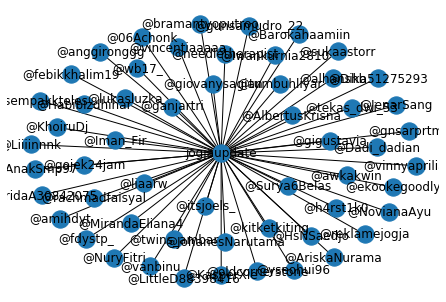

In [162]:
import networkx as nx 
import matplotlib.pyplot as plt 
import json

file = "sample.json"
G = nx.Graph()
names = []

with open (file, "r") as json_file:
    data = json.load(json_file)
    relationship = data["like_list"]
    # print(data)
    for i in relationship:
       names.append(tuple(i))

# node_sizes = [(names.count(node)*1000000) for node in G.nodes()]
# print(names)
G.add_edges_from(names)
# G.add_nodes_from(names)
nx.draw(G, with_labels=True)
plt.show()

[0, 300, 600, 300, 300, 300, 300, 900, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 600, 300, 300, 300, 300, 300, 300, 300, 300, 600, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300]


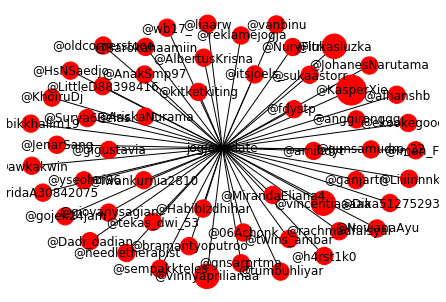

In [86]:
import networkx as nx 
import matplotlib.pyplot as plt 
import xml.etree.ElementTree as ET 

file = "coordinates3.xml"
G = nx.Graph()
names = []
total_likes =  []

tree = ET.parse(file)
root = tree.getroot()

for item in root.iter("relationship"):
    user = item.attrib["username"]
    likes = item.attrib["list_likes"]
    G.add_node(user)
    G.add_node(likes)
    total_likes.append(likes)
    names.append((user, likes))
    
    
# print(names)
node_sizes = [(total_likes.count(node)*300)for node in G.nodes()] 

# print (G.nodes())
print (node_sizes)
G.add_edges_from(names)
nx.draw(G, with_labels=True, node_color='red', node_size = node_sizes) 
plt.draw()